## Modules

In [82]:
#Import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.cross_validation import cross_val_score
from sklearn.base import TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.svm import SVC
import sklearn.model_selection as ms
import sklearn.decomposition as de
import csv
from sklearn import metrics
from sklearn.datasets import load_sample_image
from skimage import io as ioi
from sklearn.preprocessing import label_binarize
from mpl_toolkits.mplot3d import Axes3D
from skimage.util import crop
from skimage.color import rgb2gray
from skimage.transform import rescale
import os
import glob
import array as arr



#Plot in cells
%matplotlib inline

## Load the .csv file and the images

In [3]:
# Load data from csv file
data = pd.read_csv('H:\LMU\Semester-1\Astro AI\Galaxy Zoo Project\Data\galaxy_zoo_labels.csv')
files = glob.glob("H:/LMU/Semester-1/Astro AI/Galaxy Zoo Project/Data/images_training_rev1/*.jpg")

#samples
n=1000

# create a simple array with numpy empty() 
imgs = []
for i in files[:n]:
    img = ioi.imread(i)
    im = img[110:310,110:310]
    img_gray = rgb2gray(im)
    imgs.append(img_gray)
    
imgs = np.array(imgs)

# Due to the large number of images, only taking 8000 images
data = data[:n]



## Converting the data into the classes

In [4]:
class1=[]
class2=[]
class3=[]
class4=[]
class5=[]
class6=[]
class7=[]
class8=[]
class9=[]
class10=[]
class11=[]

for i in range(len(data)):
    c1 = list(data.iloc[i][['Class1.1','Class1.2','Class1.3']])
    c2 = list(data.iloc[i][['Class2.1','Class2.2']])
    c3 = list(data.iloc[i][['Class3.1','Class3.2']])
    c4 = list(data.iloc[i][['Class4.1','Class4.2']])
    c5 = list(data.iloc[i][['Class5.1','Class5.2','Class5.3','Class5.4']])
    c6 = list(data.iloc[i][['Class6.1','Class6.2']])
    c7 = list(data.iloc[i][['Class7.1','Class7.2','Class7.3']])
    c8 = list(data.iloc[i][['Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6', 'Class8.7']])
    c9 = list(data.iloc[i][['Class9.1', 'Class9.2', 'Class9.3']])
    c10 = list(data.iloc[i][['Class10.1', 'Class10.2', 'Class10.3']])
    c11 = list(data.iloc[i][['Class11.1', 'Class11.2', 'Class11.3', 'Class11.4', 'Class11.5', 'Class11.6']]) 
   
    class1.append((c1.index(max(c1))))
    class2.append((c2.index(max(c2))))
    class3.append((c3.index(max(c3))))
    class4.append((c4.index(max(c4))))
    class5.append((c5.index(max(c5))))
    class6.append((c6.index(max(c6))))
    class7.append((c7.index(max(c7))))
    class8.append((c8.index(max(c8))))
    class9.append((c9.index(max(c9))))
    class10.append((c10.index(max(c10))))
    class11.append((c11.index(max(c11))))

    
#print(np.sort(c1))

## Split the data and images

In [92]:

# Dividing the data set into three sets train, test, valid with the ratio of 0.2
test_ratio = 0.2
train_set, test_set, img_train, img_test = train_test_split(class8,imgs, test_size=test_ratio, random_state=160982)
train_set, valid_set, img_train, img_valid = train_test_split(train_set,img_train, test_size=test_ratio, random_state=160982)

## Reshaping the array

In [93]:
imtrain = img_train.reshape(img_train.shape[0],40000)
imtest = img_test.reshape(img_test.shape[0],40000)
imvalid = img_valid.reshape(img_valid.shape[0],40000)


## PCA dimension reduction

In [94]:
pca = de.PCA(0.96)
imtrainp = pca.fit_transform(imtrain)
imtestp  = pca.transform(imtest)
imvalidp  = pca.transform(imvalid)

#print(pca.n_components_)
#print(imtrainp.shape,imtestp.shape,imvalidp.shape)

## ML 

 ## SVM with different kernels

In [95]:
#Create a svm Classifier


#clf = svm.SVC(decision_function_shape='ovo')

#Linear 
#clf = svm.SVC(kernel = 'linear',C=10)

#Gaussian
clf = svm.SVC(kernel='rbf', gamma=0.01, C=100)

#Polynomial
#clf = svm.SVC(kernel='poly', degree=4, C=1000)

#Sigmoid
#clf = svm.SVC(kernel='sigmoid')


#Train the model using the training sets
clf.fit(imtrainp, train_set)

#Predict the response for test dataset
y_pred = clf.predict(imtestp)


In [96]:
def accuracy(test_set,y_pred):
    j=0
    acc = np.array(test_set)

    for i in range(len(y_pred)):
    
        if y_pred[i] == acc[i] :
            j+=1
    return j,len(y_pred)
        
accuracy(test_set,y_pred)

(67, 200)

## Regularization

(1) In the kernel 'rbf', the regularization parameters are gamma, C which defines the margin. If we set C very small then it has very less accuracy. At intermediate value of it, it is showing the great accuracy and at higher it again decreases the accuracy. This is called overfitting. Thus, regularization is necessary to avoid the overfitting.

In [97]:
C_2d_range = [0.000001,0.001,0.01,0.1,1,10,20,50,100,1000,2000,5000]
#gamma_2d_range = [0.001,0.01,0.1,1,10]
gamma_2d_range = [0.001]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(kernel='rbf',C=C, gamma=gamma)
        clf.fit(imtrainp, train_set)
        y_pred = clf.predict(imtestp)
        accu = accuracy(test_set,y_pred)
        classifiers.append((C, gamma, accu[0]/len(y_pred)))
        
print(classifiers)

[(1e-06, 0.001, 0.285), (0.001, 0.001, 0.285), (0.01, 0.001, 0.285), (0.1, 0.001, 0.305), (1, 0.001, 0.3), (10, 0.001, 0.31), (20, 0.001, 0.32), (50, 0.001, 0.3), (100, 0.001, 0.295), (1000, 0.001, 0.315), (2000, 0.001, 0.315), (5000, 0.001, 0.315)]


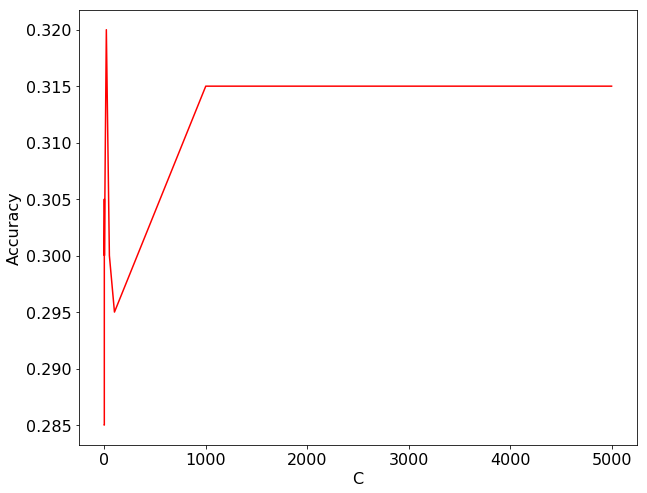

In [98]:
fig = plt.figure(figsize=(10,8))
x=[]
y=[]
z=[]
for i in range(len(classifiers)):
    x.append(classifiers[i][0])
    y.append(classifiers[i][1])
    z.append(classifiers[i][2])
    
plt.plot(x,z,color='r')
plt.xlabel('C',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Learning curve

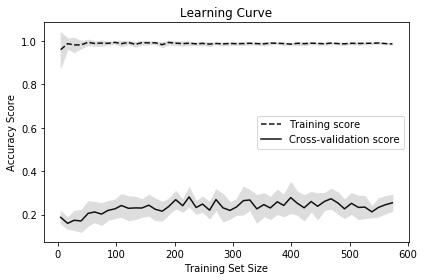

In [99]:
# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(), 
                                                        imtrainp, 
                                                        train_set,
                                                        # Number of folds in cross-validation
                                                        cv=10,
                                                        # Evaluation metric
                                                        scoring='accuracy',
                                                        # Use all computer cores
                                                        n_jobs=-1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes=np.linspace(0.01, 1.0, 50))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


## Hyper-parameters using the validation set

In [100]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf','poly','sigmoid']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3);
  
# fitting the model for grid search 
grid.fit(imvalidp, valid_set);

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


Fitting 3 folds for each of 75 candidates, totalling 225 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.26785714285714285, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.2830188679245283, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.27450980392156865, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.19642857142857142, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.1509433962264151, total=   0.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV]  C=0.1, gamma=1, kernel=poly, score=0.17647058823529413, total=   0.0s
[CV] C=0.1, gamma=1, kernel=sigmoid .........................

[CV]  C=1, gamma=0.1, kernel=rbf, score=0.2549019607843137, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV]  C=1, gamma=0.1, kernel=poly, score=0.19642857142857142, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV]  C=1, gamma=0.1, kernel=poly, score=0.1509433962264151, total=   0.0s
[CV] C=1, gamma=0.1, kernel=poly .....................................
[CV]  C=1, gamma=0.1, kernel=poly, score=0.17647058823529413, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV]  C=1, gamma=0.1, kernel=sigmoid, score=0.2857142857142857, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV]  C=1, gamma=0.1, kernel=sigmoid, score=0.20754716981132076, total=   0.0s
[CV] C=1, gamma=0.1, kernel=sigmoid ..................................
[CV]  C=1, gamma=0.1, kernel=sigmoid, score=0.2549019607843137, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....

[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.33962264150943394, total=   0.0s
[CV] C=10, gamma=0.01, kernel=sigmoid ................................
[CV]  C=10, gamma=0.01, kernel=sigmoid, score=0.19607843137254902, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.26785714285714285, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.2830188679245283, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV]  C=10, gamma=0.001, kernel=rbf, score=0.2549019607843137, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=poly, score=0.26785714285714285, total=   0.0s
[CV] C=10, gamma=0.001, kernel=poly ..................................
[CV]  C=10, gamma=0.001, kernel=poly, score=0.2830188679245283, total=   0.0s
[CV] C=10, gamma=0.001,

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.32075471698113206, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.3137254901960784, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV]  C=100, gamma=0.0001, kernel=poly, score=0.26785714285714285, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV]  C=100, gamma=0.0001, kernel=poly, score=0.2830188679245283, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=poly ................................
[CV]  C=100, gamma=0.0001, kernel=poly, score=0.27450980392156865, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV]  C=100, gamma=0.0001, kernel=sigmoid, score=0.32142857142857145, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV]  C=100, gamma=0.0001, kernel=sigmoid, score=0.33962264150943394, total=   0.0s
[CV] 

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    4.0s finished
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [101]:


# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

print((grid.best_score_))

{'C': 10, 'gamma': 0.001, 'kernel': 'sigmoid'}
SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
0.35


## Second method for the tuning

In [ ]:
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=SVC(), param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(imvalidp, valid_set)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

## Precision vs Recall 

In [102]:
print(confusion_matrix(test_set,y_pred))
print(classification_report(test_set,y_pred))

[[24  1 10  5  8  1  0]
 [ 6  2  2  3  2  1  0]
 [18  1  8  4  5  0  1]
 [ 6  1  5 10  9  0  0]
 [19  3  9  3 19  4  0]
 [ 0  0  3  3  3  0  0]
 [ 0  0  1  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.33      0.49      0.39        49
           1       0.25      0.12      0.17        16
           2       0.21      0.22      0.21        37
           3       0.36      0.32      0.34        31
           4       0.41      0.33      0.37        57
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         1

   micro avg       0.32      0.32      0.32       200
   macro avg       0.22      0.21      0.21       200
weighted avg       0.31      0.32      0.31       200



## ROC Curve


In [41]:
# Binarize the output
y = label_binarize(class6, classes=[0, 1])
testb = label_binarize(test_set, classes=[0, 1])
n_classes = y.shape[0]

test_score = clf.fit(imtrainp, train_set).decision_function(imtestp)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(testb[:], test_score[:])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(testb.ravel(), test_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

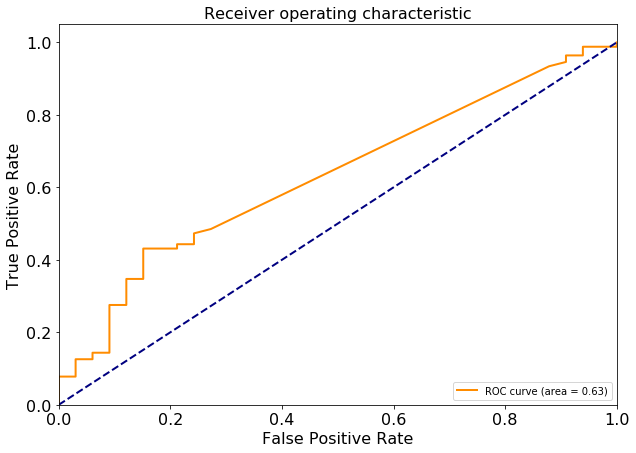

In [42]:
plt.figure(figsize=(10,7))
lw = 2

plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=16)
plt.ylabel('True Positive Rate',fontsize=16)
plt.title('Receiver operating characteristic',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(loc="lower right")
plt.show()

## Final score

In [103]:
print('The final score is :',clf.score(imtestp,test_set))

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_set, y_pred))


# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(test_set, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(test_set, y_pred))

The final score is : 0.315
Accuracy: 0.315


ValueError: Target is multiclass but average='binary'. Please choose another average setting.